# Moebius Strip And The Field of Coefficients

In this module we will explore an example in which the field of coefficients impacts the answer that 1D homology gives.  This example demonstrates that, contrary to common conventions which say to always use $\mathbb{Z} / 2$ (binary) coefficients, there may be good reasons to use other fields, especially when there are "twists."

First, we do all of the necessary imports as usual

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ripser import ripser, plot_dgms

Now we will create a closed loop which lives on a 2-torus embedded in 3 dimensions.  First, we will have the loop travel twice around the small circle (the "inner tube" part) for every one revolution around the large circle.  Given a radius $R$ for the big loop and a radius $r$ for the small loop, we sample the following parametric curve

$x(t) = (R + r \cos(2t)) \cos(t)$

$y(t) = (R + r \cos(2t)) \sin(t)$

$z(t) = r \sin(2t)$

We then compute persistent homology using both $\mathbb{Z} / 2$ and $\mathbb{Z} / 3$ coefficients

<IPython.core.display.Javascript object>


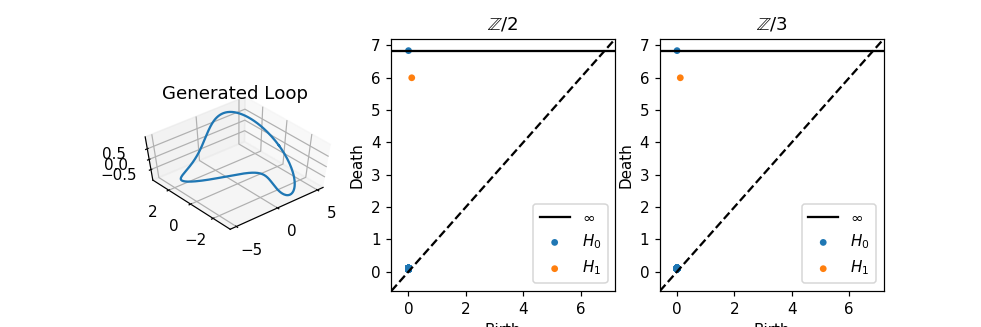

In [4]:
## Step 1: Setup curve
N = 300 # Number of points to sample
R = 4 # Big radius of torus
r = 1 # Little radius of torus
X = np.zeros((N, 3))
t = np.linspace(0, 2*np.pi, N)
X[:, 0] = (R + r*np.cos(2*t))*np.cos(t)
X[:, 1] = (R + r*np.cos(2*t))*np.sin(t)
X[:, 2] = r*np.sin(2*t)

## Step 2: Compute persistent homology
dgms2 = ripser(X, coeff=2)['dgms']
dgms3 = ripser(X, coeff=3)['dgms']

fig = plt.figure(figsize=(9, 3))
ax = fig.add_subplot(131, projection='3d')
ax.plot(X[:, 0], X[:, 1], X[:, 2])
ax.set_aspect('equal')
plt.title("Generated Loop")
plt.subplot(132)
plot_dgms(dgms2)
plt.title("$\mathbb{Z} / 2$")
plt.subplot(133)
plot_dgms(dgms3)
plt.title("$\mathbb{Z} / 3$")


plt.show()

Although the loop is very curved, we still see just one class forming in H1, and the persistence diagrams are the same for $\mathbb{Z} / 2$ and $\mathbb{Z} / 3$ coefficients; there is one class born at around $0$ which dies at $r + R$.

If, on the other hand, we have the loop go twice around the big circle for every once around the small circle; that is, the following parametric curve

$x(t) = (R + r \cos(t)) \cos(2t)$

$y(t) = (R + r \cos(t)) \sin(2t)$

$z(t) = r \sin(t)$

<IPython.core.display.Javascript object>


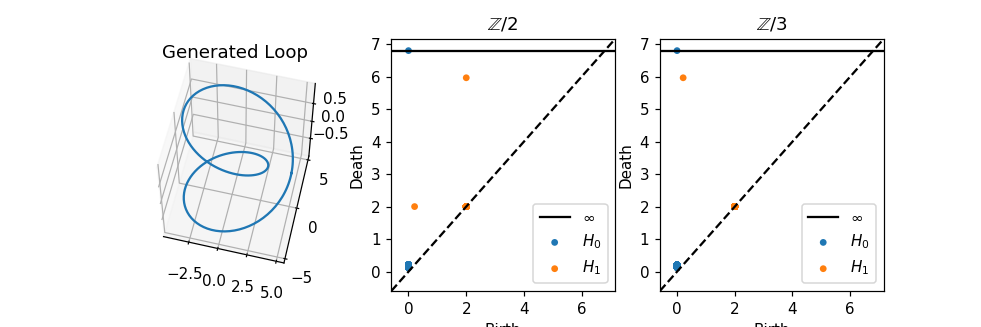

In [3]:
X[:, 0] = (R + r*np.cos(t))*np.cos(2*t)
X[:, 1] = (R + r*np.cos(t))*np.sin(2*t)
X[:, 2] = r*np.sin(t)

## Step 2: Compute persistent homology
dgms2 = ripser(X, coeff=2)['dgms']
dgms3 = ripser(X, coeff=3)['dgms']

fig = plt.figure(figsize=(9, 3))
ax = fig.add_subplot(131, projection='3d')
ax.plot(X[:, 0], X[:, 1], X[:, 2])
ax.set_aspect('equal')
plt.title("Generated Loop")
plt.subplot(132)
plot_dgms(dgms2)
plt.title("$\mathbb{Z} / 2$")
plt.subplot(133)
plot_dgms(dgms3)
plt.title("$\mathbb{Z} / 3$")


plt.show()

In this case, we actually see a change in the diagrams for different field coefficients.  For $\mathbb{Z}/2$, there is a class which is born around $0$ and which dies at $r$, and there is a class which is born at $r$ and dies at $r + R$.  By contrast, for $\mathbb{Z}/3$, there is a single high persistence class which is born at around $0$ and which dies at $r+R$, just as before.  In other words, using $\mathbb{Z}/2$ coefficients "splits" the bar from $[0, r+R)$ into two bars: $[0, r)$ and $[r, r+R)$.  Geometrically, what's happening in this case is that the loop we have parameterized is *the boundary of a Moebius strip*, whose strip width is $r$.  For $\mathbb{Z}/2$ coefficients, a class is born at $0$ but is bounded when the strip width fills in at $r$, at which point another class is born which is not topologically equivalent to the original class.  By contrast, with $\mathbb{Z} / 3$ coefficients, the curve is not bounded when the strip is filled in at $r$; it is only bounded at the end when the entire torus fills in.